# Insight From The 2018 Stack Overflow Survey Data For Aspiring Developers

With more than 100,000 responses fielded from 183 countries and dependent territories, stackoverflow's 2018 Annual Developer Survey is the most comprehensive survey of software developers ever conducted. All aspects of the developer experience from career satisfaction and job search to education and sound preference when coding were surveyed.

In this project we will be using the survey results to answer some questions that may be in the minds of professionals who are thinking about changing careers to some type of developer.

To achive the end results for this project, we will be employing CRISP-DM. The CRISP-DM Process (Cross Industry Process for Data Mining) is used to find manys solutions in the data science process. It includes the following 6 steps:
1. business understanding
2. data understanding
3. prepare data
4. data modelling
5. evaluate the results
6. deploy
    

A blogpost about this project summarizing this project and it's findings can be found in [my medium](https://medium.com/@tahsinac).


## The Questions That Need Answers

As I have recently decided to leave behind a career in chemical engineering to pursue data science/machine learning, I have an idea of some of the questions that may be in the minds of people in similar situations. Questions for which I wish I had the answers when I started out:

*   What language should I start off with?
*   How satisfying would a career as a developer be?
*   What is the lifestyle of a typical developer?
*   What's the pay like?
*   Will I make it as a developer if I start out now?





## Importing Necessary Libraries

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

## Loading The Data

The 2018 survey results, along with results from previous years can be found [here](https://insights.stackoverflow.com/survey). A schema explaining the different survey questions is also available.

In [269]:
from google.colab import drive
drive.mount('/content/gdrive')

df = pd.read_csv("gdrive/My Drive/Colab Notebooks/Colab Data/survey_results_public.csv", low_memory = False)
schema = pd.read_csv("gdrive/My Drive/Colab Notebooks/Colab Data/survey_results_schema.csv")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [270]:
df.shape

(98855, 129)

So, we have a dataset with 129 features and 98855 samples.

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98855 entries, 0 to 98854
Columns: 129 entries, Respondent to SurveyEasy
dtypes: float64(41), int64(1), object(87)
memory usage: 97.3+ MB


In [0]:
# this function will help us understand the different survey fields

def col_description(col_name, schema):
    '''
    INPUT - schema - pandas dataframe with the schema of the developers survey
            col_name - string - the name of the column you would like to know about
    OUTPUT - 
            desc - string - the description of the column
    '''
    desc = list(schema[schema['Column'] == col_name]['QuestionText'])[0]
    print('{} : {}\n'.format(col_name, desc))
    return 

## What Language Should I Start Off With?

There are just so, so many programming languages. And when you don't know much, which is very usual at the start, this can be very overwhelming. So let's take a look at what different developers from around the world use. That should give us an idea of what laguagues are important for what fields. 

In [0]:
#picking out features that are useful for this question
lang_df = df[['DevType', 'YearsCoding', 'YearsCodingProf', 'Employment', 'LanguageWorkedWith', 'LanguageDesireNextYear']]

Checking out some of the columns we will be looking at for this part..

In [274]:
for col in lang_df.columns.tolist():
    col_description(col, schema)

DevType : Which of the following describe you? Please select all that apply.

YearsCoding : Including any education, for how many years have you been coding?

YearsCodingProf : For how many years have you coded professionally (as a part of your work)?

Employment : Which of the following best describes your current employment status?

LanguageWorkedWith : Which of the following programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year?  (If you both worked with the language and want to continue to do so, please check both boxes in that row.)

LanguageDesireNextYear : Which of the following programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year?  (If you both worked with the language and want to continue to do so, please check both boxes in that row.)



In [275]:
# missing values
print('Percentage of data that is missing: {:.2f}'.format((lang_df['LanguageWorkedWith'].isnull().sum()/len(lang_df['LanguageWorkedWith']))*100))
print('Percentage of data that is missing: {:.2f}'.format((lang_df['DevType'].isnull().sum()/len(lang_df['DevType']))*100))

Percentage of data that is missing: 20.76
Percentage of data that is missing: 6.84


In [276]:
lang_df = lang_df.dropna(subset = ['LanguageWorkedWith'], axis = 0)
lang_df = lang_df.dropna(subset = ['DevType'], axis = 0)
lang_df.shape

(76865, 6)

In [277]:
lang_df.head(3)

,DevType,YearsCoding,YearsCodingProf,Employment,LanguageWorkedWith,LanguageDesireNextYear
0,Full-stack developer,3-5 years,3-5 years,Employed part-time,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS
1,Database administrator;DevOps specialist;Full-...,30 or more years,18-20 years,Employed full-time,JavaScript;Python;Bash/Shell,Go;Python
3,Full-stack developer,18-20 years,12-14 years,Employed full-time,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell


### The Overall Picture

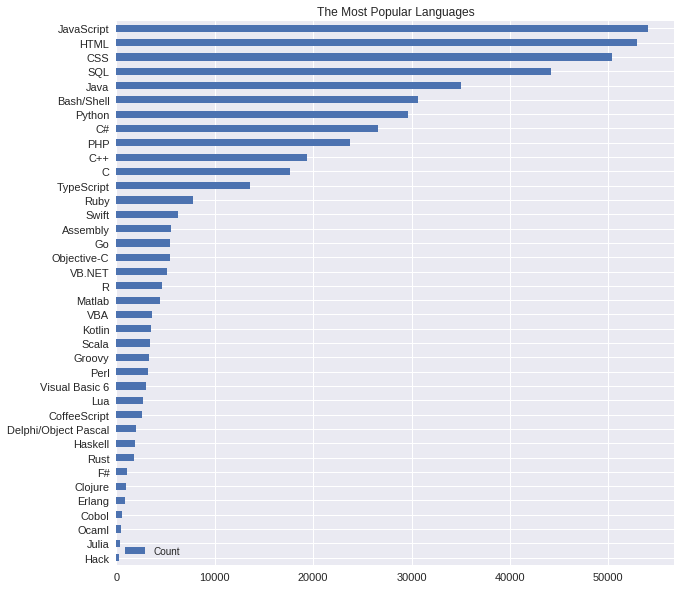

In [278]:
uniq_langs = {}

for lang_set in lang_df['LanguageWorkedWith'].apply(lambda col: str(col).split(';')):
    for lang in lang_set:
        if lang not in uniq_langs.keys():
            uniq_langs[lang] = 1
        else:
            uniq_langs[lang] += 1

lang_count = pd.DataFrame.from_dict(uniq_langs, orient='index', dtype=None)
lang_count.columns = ['Count']
lang_count.sort_values('Count',ascending=True,inplace=True)

lang_count.plot(kind = 'barh', figsize = (10,10), fontsize = 11, title = 'The Most Popular Languages');
plt.savefig('1.png', bbox_inches = 'tight')

This graph gives us an overall picture. These are the most used langages by all kinds of developers combined. Javascript, HTML, CSS and SQL are very diely used while Hack and Julia are two of the least used languages.

Although it's nice to know the over all picture, the result here doesn't help us much. Different languagges are used for different programming applications. So what we will do now is find the most widely used languages by each type of developer. That way, if you know the field you are targeting to break into, you can just check out what are top laguages for that field.

In [0]:
uniq_langs = {}

for lang_set in lang_df['LanguageWorkedWith'].apply(lambda col: str(col).split(';')):
    for lang in lang_set:
        if lang not in uniq_langs.keys():
            uniq_langs[lang] = 1
        else:
            uniq_langs[lang] += 1

lang_count = pd.DataFrame.from_dict(uniq_langs, orient='index', dtype=None)
lang_count.columns = ['Count']
lang_count.sort_values('Count',ascending=True,inplace=True)

In [0]:
uniq_devs = {}

for dev_set in lang_df['DevType'].apply(lambda col: str(col).split(';')):
    for dev in dev_set:
        if dev not in uniq_devs.keys():
            uniq_devs[dev] = 1
        else:
            uniq_devs[dev] += 1
            
dev_count = pd.DataFrame.from_dict(uniq_devs, orient='index', dtype=None)
dev_count.columns = ['Count']
dev_count.sort_values('Count',ascending=False,inplace=True)


In [0]:
common_dev_types = ['Full-stack developer', 'Back-end developer', 'Front-end developer', 'Mobile developer', 'Student', 'Data or business analyst', 'Data scientist or machine learning specialist', 'Educator or academic researcher', 'Game or graphics developer']
uniq_langs_list = list(uniq_langs.keys())

In [0]:
dev_dict = {}
for devtype in dev_count.index.tolist():
    dev_dict['{}'.format(devtype)] = {}

for dev in dev_dict.keys():
    dev_dict[dev] = {key: 0 for key in uniq_langs_list}
    
for i, d in enumerate(lang_df['DevType']):
    all_devs = d.split(';')
    all_langs = lang_df.iloc[i, 4].split(';')
    
    for dev in all_devs:
        for lang in all_langs:
            dev_dict[dev][lang] += 1

dev_lang_count = pd.DataFrame.from_dict(dev_dict, orient='index', dtype=None).T

In [0]:
# function for getting the 10 most used language by any developer type 

def top_langs(dev_lang_count, dev_type, filename):
    '''
    INPUT - dev_lang_count - pandas dataframe containing the count of the different languages used by different dev types
            dev_type - string - type of most common dev 
            filename - string - file name of the graph to be saved as
    
    OUTPUT - bar chart showing the top 10 most used language used by the particular dev type
            
    '''
    
    dev_lang_count[dev_type].sort_values(ascending = False).head(10).plot(kind = 'bar', figsize = (10,5), color = 'salmon')
    plt.title('10 languages used most by {}'.format(dev_type), fontsize = 15)
    plt.xticks(rotation = 0, fontsize = 12)
    plt.savefig(filename, bbox_inches = 'tight')
    plt.show()
    return

We can use this function to see what are the top 10 most used language for any field.  As I'm currently trying to break into the data science field, let's have a look at what languages used by data scientists.

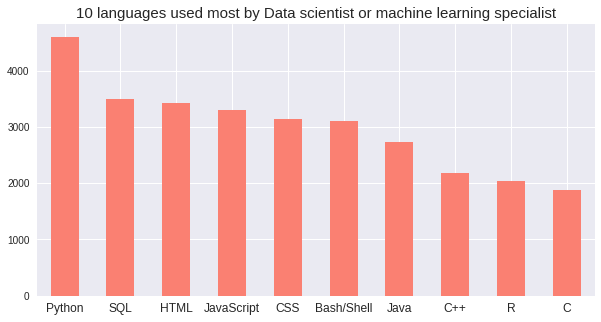

In [284]:
top_langs(dev_lang_count, 'Data scientist or machine learning specialist', filename = '2.png')

So there they are. Looks like python is the most widely used language by data scientists. SQL and HTML come in at second and third. R is not as widely used. This is surprising as a lot of job postings ask for R as a requirement.

Phew, thankfully I did start off with Python but my decision to do so was not backed up my data. Only a few internet articles and the fact that the MOOC I started off with was in Python. I've learnt SQL as well along the way. Judging by the results from this analysis, I need to start learning some HTML and Javascript soon!

So if you are thinking of breaking into the data science field, you know what languages are important now. If you want to become some other kind of developer, just use the function and find out what's important! 




### How Do These Numbers Vary With Coding Experience?

It's good to think about the future. So let's see how these numbers change as developer gain more and more experience.

In [0]:
yrs_lang_df = lang_df[['DevType', 'YearsCodingProf', 'LanguageWorkedWith']]
yrs_interested = ['0-2 years','3-5 years','6-8 years']

yrs_lang_df = yrs_lang_df[(yrs_lang_df['YearsCodingProf'] == '0-2 years') | (yrs_lang_df['YearsCodingProf'] == '3-5 years') | (yrs_lang_df['YearsCodingProf'] == '6-8 years')]
yrs_lang_df.reset_index(drop = True);

In [0]:
dev_dict = {}
for devtype in dev_count.index.tolist():
    dev_dict['{}'.format(devtype)] = {}

for dev in dev_dict.keys():
    dev_dict[dev] = {key: np.nan for key in yrs_interested}
for dev in dev_dict.keys():
    for yr in dev_dict[dev].keys():
        dev_dict[dev][yr] = {key: 0 for key in uniq_langs_list}

for i, d in enumerate(yrs_lang_df['DevType']):
    all_devs = d.split(';')
    all_langs = yrs_lang_df.iloc[i, 2].split(';')
    yr = yrs_lang_df.iloc[i, 1]
    
    for dev in all_devs:
        for lang in all_langs:
            dev_dict[dev][yr][lang] += 1
            
dev_yrs_lang_count = pd.DataFrame.from_dict({(i,j): dev_dict[i][j] 
                           for i in dev_dict.keys() 
                           for j in dev_dict[i].keys()},
                       orient='index').T

In [0]:
def top_langs_by_exp(dev_yrs_lang_count, dev_type, filename):
    '''
    INPUT - dev_yrs_lang_count - pandas dataframe containing the count of the different languages used by different dev types
                                 with different amount of experience
            dev_type - string - type of most common dev 
    
    OUTPUT - bar chart showing the top 10 most used language used by the particular dev type for different exp bins
    '''
    
    fig = plt.figure(figsize = (10,7))

    plt.subplot(3,1,1)
    plt.bar(x = np.arange(10), height = dev_yrs_lang_count[dev_type]['0-2 years'].sort_values(ascending = False).head(10))
    plt.xticks(np.arange(10), dev_yrs_lang_count[dev_type]['0-2 years'].sort_values(ascending = False).head(10).index.tolist(),fontsize = 12)
    plt.title('10 languages used most by {} with 0-2 years experience'.format(dev_type), fontsize = 12)
    
    plt.subplot(3,1,2)
    plt.bar(x = np.arange(10), height = dev_yrs_lang_count[dev_type]['3-5 years'].sort_values(ascending = False).head(10))
    plt.xticks(np.arange(10), dev_yrs_lang_count[dev_type]['3-5 years'].sort_values(ascending = False).head(10).index.tolist(),fontsize = 12)
    plt.title('10 languages used most by {} with 3-5 years experience'.format(dev_type), fontsize = 12)
    
    plt.subplot(3,1,3)
    plt.bar(x = np.arange(10), height = dev_yrs_lang_count[dev_type]['6-8 years'].sort_values(ascending = False).head(10))
    plt.xticks(np.arange(10), dev_yrs_lang_count[dev_type]['6-8 years'].sort_values(ascending = False).head(10).index.tolist(),fontsize = 12)
    plt.title('10 languages used most by {} with 6-8 years experience'.format(dev_type), fontsize = 12)
    
    plt.tight_layout()
    plt.savefig(filename, bbox_inches = 'tight')
    plt.show()
  
    return

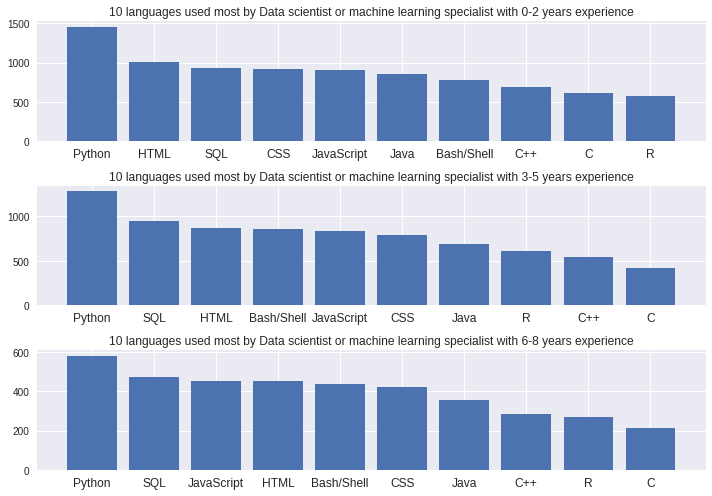

In [288]:
top_langs_by_exp(dev_yrs_lang_count, 'Data scientist or machine learning specialist', filename = '3.png')

Looks like the languages used by data scientists have been more or less the same as they have gained more experience.

## How Satisfying Would A Career As A Developer Be?

For anyone who is looking to move to a different career path, the making the decision to do so can be extremely difficult. One of the main reasons behind transitioning into a new career is not being happy or satisfied with the current career. So before moving into a new field, it's important to know if it will be the same or give genuine satisfaction.

In [289]:
sat_df = df[['OpenSource','Hobby', 'DevType', 'JobSatisfaction','CareerSatisfaction','HopeFiveYears','AgreeDisagree1','AgreeDisagree2','AgreeDisagree3']]

for col in sat_df.columns.tolist():
    col_description(col, schema)

OpenSource : Do you contribute to open source projects?

Hobby : Do you code as a hobby?

DevType : Which of the following describe you? Please select all that apply.

JobSatisfaction : How satisfied are you with your current job? If you work more than one job, please answer regarding the one you spend the most hours on.

CareerSatisfaction : Overall, how satisfied are you with your career thus far?

HopeFiveYears : Which of the following best describes what you hope to be doing in five years?

AgreeDisagree1 : To what extent do you agree or disagree with each of the following statements? I feel a sense of kinship or connection to other developers

AgreeDisagree2 : To what extent do you agree or disagree with each of the following statements? I think of myself as competing with my peers

AgreeDisagree3 : To what extent do you agree or disagree with each of the following statements? I'm not as good at programming as most of my peers



In [290]:
#missing values
round((sat_df.isnull().sum()/len(sat_df))*100,1)

OpenSource             0.0
Hobby                  0.0
DevType                6.8
JobSatisfaction       29.9
CareerSatisfaction    22.6
HopeFiveYears         23.4
AgreeDisagree1        31.0
AgreeDisagree2        30.9
AgreeDisagree3        30.8
dtype: float64

Interestingly enough, about 30% of the respondents did not disclose the level of satisfaction in their jobs and  23% did not disclose the level of satisfaction in their careers.

In [291]:
sat_df.dropna(inplace = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Satisfaction : Job & Career

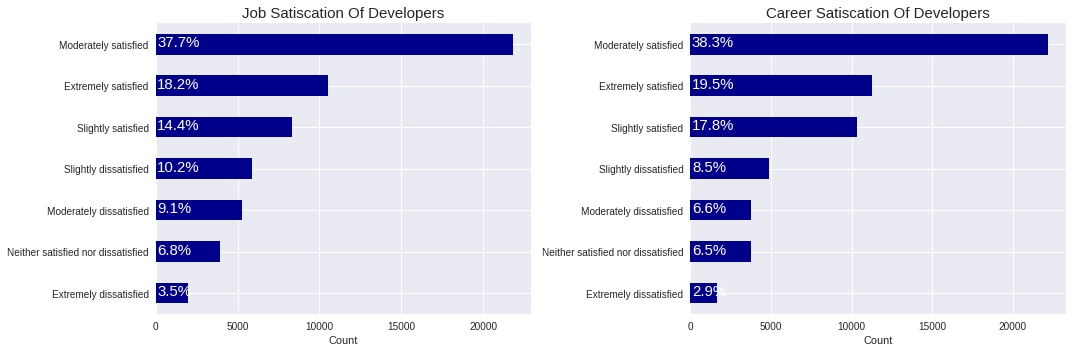

In [292]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax = sat_df['JobSatisfaction'].value_counts().sort_values(ascending = True).plot(kind = 'barh', color = 'darkblue')
ax.set_title('Job Satiscation Of Developers', fontsize = 15)
ax.set_xlabel('Count')
for i in ax.patches:
  ax.text(100,i.get_y()+0.19,str(round(i.get_width()/len(sat_df)*100,1))+'%',color='white',fontsize=15)

plt.subplot(1,2,2)
ax = sat_df['CareerSatisfaction'].value_counts().sort_values(ascending = True).plot(kind = 'barh', color = 'darkblue')
ax.set_title('Career Satiscation Of Developers', fontsize = 15)
ax.set_xlabel('Count')
for i in ax.patches:
  ax.text(100,i.get_y()+0.19,str(round(i.get_width()/len(sat_df)*100,1))+'%',color='white',fontsize=15)

plt.tight_layout()
plt.savefig('4.png', bbox_inches = 'tight')
plt.show()

Looks like quite a large percentage of developers are satisfied with both their jobs and careers, with above 18% showing high levels of satisfaction for both.

So if you love coding and and all the facing other challenges that developers face it's likely that you'll be satisfied with your job and new career!

### Satisfaction : Relationships

Satisfaction with your work is not only dependent on where you work or what you work as. The relationships you build at work are also somewhat crucial. So let's have a look at relationships between developers.

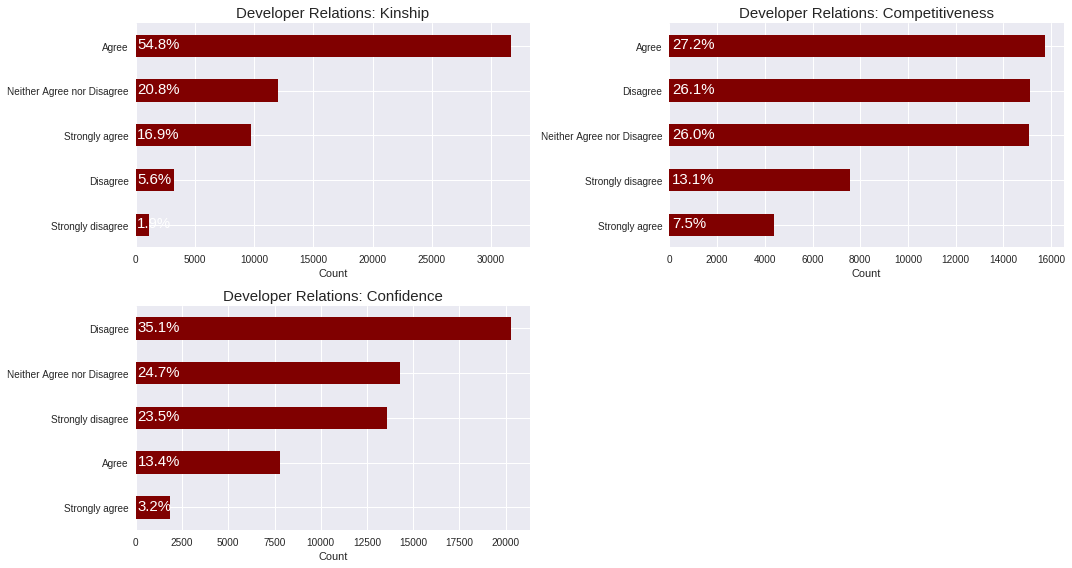

In [293]:
fig = plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
ax = sat_df['AgreeDisagree1'].value_counts().sort_values(ascending = True).plot(kind = 'barh', color = 'maroon')
ax.set_title('Developer Relations: Kinship', fontsize = 15)
ax.set_xlabel('Count')
for i in ax.patches:
  ax.text(100,i.get_y()+0.19,str(round(i.get_width()/len(sat_df)*100,1))+'%',color='white',fontsize=15)

plt.subplot(2,2,2)
ax = sat_df['AgreeDisagree2'].value_counts().sort_values(ascending = True).plot(kind = 'barh', color = 'maroon')
ax.set_title('Developer Relations: Competitiveness', fontsize = 15)
ax.set_xlabel('Count')
for i in ax.patches:
  ax.text(100,i.get_y()+0.19,str(round(i.get_width()/len(sat_df)*100,1))+'%',color='white',fontsize=15)

plt.subplot(2,2,3)
ax = sat_df['AgreeDisagree3'].value_counts().sort_values(ascending = True).plot(kind = 'barh', color = 'maroon')
ax.set_title('Developer Relations: Confidence', fontsize = 15)
ax.set_xlabel('Count')
for i in ax.patches:
  ax.text(100,i.get_y()+0.19,str(round(i.get_width()/len(sat_df)*100,1))+'%',color='white',fontsize=15)

plt.tight_layout()
plt.savefig('5.png',bbox_inches = 'tight')
plt.show()

It's nice to know that over half of the respondents feel a sense of kinship to other developers. The online communities of develeprs such as stackoverflow is a testament to this. It's important to have the support and help of your peers at work.

Only around 27% of the developrs have competetive attitudes, which isn't necessarily a bad thing. Healthy competition amongst co-workers can produce great results.

Finally, majority of the developers disagreed with the notion that they feel their peers are better than them, meaning they are confident in their own abilities.

## What Is The Lifestyle Of A Typical Developer Like?

So what are the hours like for jobs in your new career? Do you really have to stay glues to the computer screen? Will you have enough time left in the day to go outside or excercise?

All these things have a massive impact on the quality of life of any individual. So it's important to know what you are signing up for.

In [294]:
lyf_df = df[['DevType', 'YearsCoding', 'YearsCodingProf', 'Employment', 'WakeTime', 'HoursComputer', 'HoursOutside', 'SkipMeals', 'Exercise']]

for col in lyf_df.columns.tolist():
    col_description(col, schema)

DevType : Which of the following describe you? Please select all that apply.

YearsCoding : Including any education, for how many years have you been coding?

YearsCodingProf : For how many years have you coded professionally (as a part of your work)?

Employment : Which of the following best describes your current employment status?

WakeTime : On days when you work, what time do you typically wake up?

HoursComputer : On a typical day, how much time do you spend on a desktop or laptop computer?

HoursOutside : On a typical day, how much time do you spend outside?

SkipMeals : In a typical week, how many times do you skip a meal in order to be more productive?

Exercise : In a typical week, how many times do you exercise?



In [295]:
#percentage of missing values
lyf_df.isnull().sum()/lyf_df.shape[0]*100

DevType             6.835264
YearsCoding         5.078145
YearsCodingProf    21.194679
Employment          3.574933
WakeTime           27.018360
HoursComputer      27.031511
HoursOutside       27.141773
SkipMeals          27.220677
Exercise           27.056800
dtype: float64

In [296]:
lyf_df.dropna(how = 'any', axis = 0, inplace = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


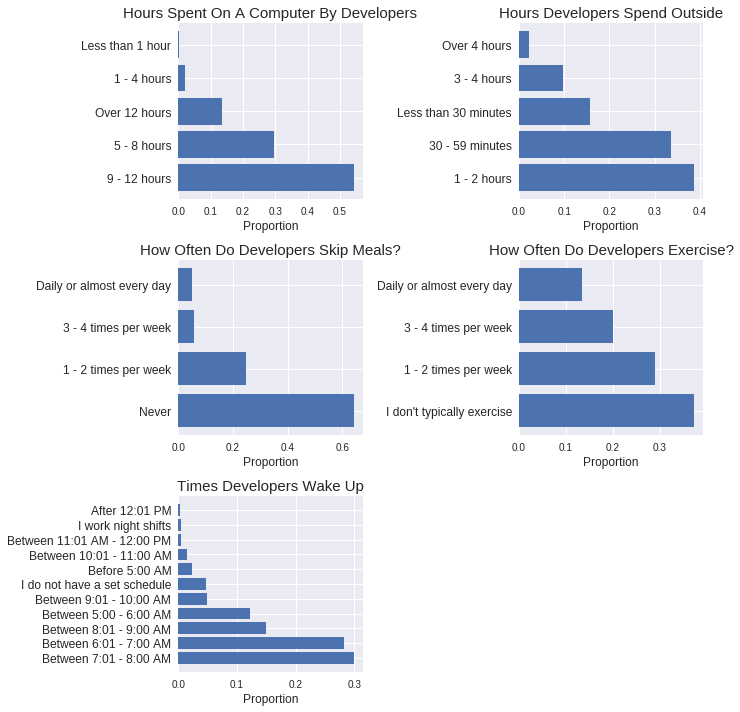

In [297]:
fig = plt.figure(figsize = (10,10))

plt.subplot(3,2,1)
plt.barh(y = np.arange(5), width = (lyf_df['HoursComputer'].value_counts())/(len(lyf_df['HoursComputer'])))
plt.yticks(np.arange(5), lyf_df['HoursComputer'].value_counts().index.tolist(),fontsize = 12)
plt.title('Hours Spent On A Computer By Developers', fontsize = 15)
plt.xlabel('Proportion', fontsize  = 12)

plt.subplot(3,2,2)
plt.barh(y = np.arange(5), width = (lyf_df['HoursOutside'].value_counts())/(len(lyf_df['HoursOutside'])))
plt.yticks(np.arange(5), lyf_df['HoursOutside'].value_counts().index.tolist(),fontsize = 12)
plt.title('Hours Developers Spend Outside', fontsize = 15)
plt.xlabel('Proportion', fontsize  = 12)

plt.subplot(3,2,3)
plt.barh(y = np.arange(4), width = (lyf_df['SkipMeals'].value_counts())/len(lyf_df['SkipMeals']))
plt.yticks(np.arange(4), lyf_df['SkipMeals'].value_counts().index.tolist(),fontsize = 12)
plt.title('How Often Do Developers Skip Meals?', fontsize = 15)
plt.xlabel('Proportion', fontsize  = 12)

plt.subplot(3,2,4)
plt.barh(y = np.arange(4), width = (lyf_df['Exercise'].value_counts())/(len(lyf_df['Exercise'])))
plt.yticks(np.arange(4), lyf_df['Exercise'].value_counts().index.tolist(),fontsize = 12)
plt.title('How Often Do Developers Exercise?', fontsize = 15)
plt.xlabel('Proportion', fontsize  = 12)

plt.subplot(3,2,5)
plt.barh(y = np.arange(11), width = (lyf_df['WakeTime'].value_counts())/(len(lyf_df['WakeTime'])))
plt.yticks(np.arange(11), lyf_df['WakeTime'].value_counts().index.tolist(),fontsize = 12)
plt.title('Times Developers Wake Up', fontsize = 15)
plt.xlabel('Proportion', fontsize  = 12)


plt.tight_layout()
plt.savefig('6.png',bbox_inches = 'tight')
plt.show()

Takeaways from the overall picture:
*   A very large proportion start their day very early (5AM - 8AM)
*   Over 35% do not exercise at all, only about 10% exercise regularly
*   Over 60% do not skip meals
*   A very large proportion does not spend much time outside
*   Over 50% spends 9-12 hours on a computer daily







Now that we have an idea about the overall lifestyles of all kinds of developers, let's take a look at some of the more concerning ones for data scientists and how they vary as they get more experienced..

In [0]:
lyf_df = lyf_df[(lyf_df['YearsCodingProf'] == '0-2 years') | (lyf_df['YearsCodingProf'] == '3-5 years') | (lyf_df['YearsCodingProf'] == '6-8 years')]
lyf_df.reset_index(drop = True);

In [0]:
def dev_lyf(lyf_df, lyf_col, dev_type, filename):
    
    temps = lyf_df[lyf_col].value_counts().index.tolist()
    
    dev_dict = {}
    for devtype in dev_count.index.tolist():
        dev_dict['{}'.format(devtype)] = {}

    for dev in dev_dict.keys():
        dev_dict[dev] = {key: np.nan for key in yrs_interested}
    for dev in dev_dict.keys():
        for yr in dev_dict[dev].keys():
            dev_dict[dev][yr] = {key: 0 for key in temps}
            
    for col_no, col in enumerate(lyf_df.columns.tolist()):
        if col == lyf_col:
            colm = col_no
            
    for i, d in enumerate(lyf_df['DevType']):
        all_devs = d.split(';')
        yr = lyf_df.iloc[i, 2]
        temp = lyf_df.iloc[i, colm]

        for dev in all_devs:
                dev_dict[dev][yr][temp] += 1

    dev_lyf_count = pd.DataFrame.from_dict({(i,j): dev_dict[i][j] 
                               for i in dev_dict.keys() 
                               for j in dev_dict[i].keys()},
                           orient='index').T

    dev_lyf_count[dev_type].plot(kind = 'barh');
    plt.title('{}, {}'.format(lyf_col, dev_type), fontsize = 15)
    plt.savefig(filename,bbox_inches = 'tight')
    return

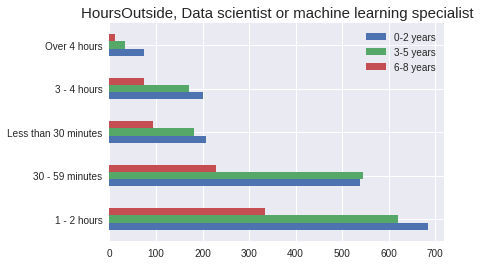

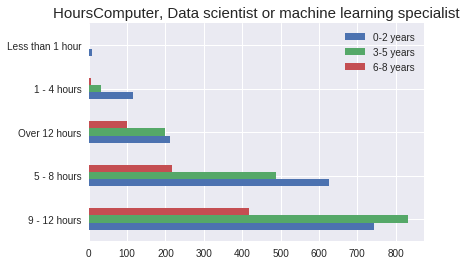

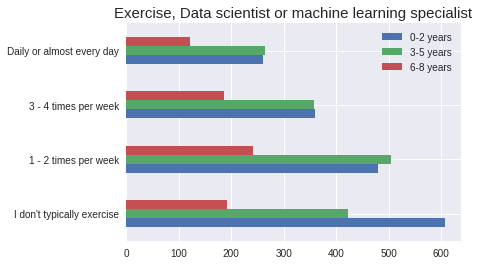

In [300]:
dev_lyf(lyf_df, 'HoursOutside', 'Data scientist or machine learning specialist', filename = '7.png')
dev_lyf(lyf_df, 'HoursComputer', 'Data scientist or machine learning specialist', filename = '8.png')
dev_lyf(lyf_df, 'Exercise', 'Data scientist or machine learning specialist', filename = '9.png')

## What's the pay like?

Finally, in this section, we will explore one of the most important aspects of any job or career: the salary. 

### Salary By Country

In [301]:
sal_df = df[['DevType', 'Country','ConvertedSalary']]

for col in sal_df.columns.tolist():
    col_description(col, schema)

DevType : Which of the following describe you? Please select all that apply.

Country : In which country do you currently reside?

ConvertedSalary : Salary converted to annual USD salaries using the exchange rate on 2018-01-18, assuming 12 working months and 50 working weeks.



In [302]:
#missing values
round((sal_df.isnull().sum()/len(sat_df))*100,1)

DevType            11.7
Country             0.7
ConvertedSalary    88.4
dtype: float64

Whoa! That's a lot of missing values! However, t's understandable if an individual does not what to disclose their salary. So, we have to work with what we have and see if we can draw some meaningful conclusions from the available data.

In [303]:
sal_df.dropna(inplace=True);
sal_df.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(47365, 3)

In [304]:
sal_df.groupby('Country')['ConvertedSalary'].mean().sort_values(ascending = False).head(10)

Country
Andorra                                 525089.500000
Liechtenstein                           284028.000000
Venezuela, Bolivarian Republic of...    241823.625000
Ireland                                 186997.457944
Botswana                                170000.000000
Saint Lucia                             159852.000000
Togo                                    159477.500000
Luxembourg                              158336.687500
Iceland                                 155966.050000
United States                           154517.797722
Name: ConvertedSalary, dtype: float64

Now, let's take a look at the annual salary distribution of the countries with the most data points.

In [305]:
sal_df['Country'].value_counts().head(10)

United States         12819
India                  4062
United Kingdom         3762
Germany                3348
Canada                 1969
France                 1430
Russian Federation     1201
Australia              1170
Brazil                 1144
Netherlands             999
Name: Country, dtype: int64

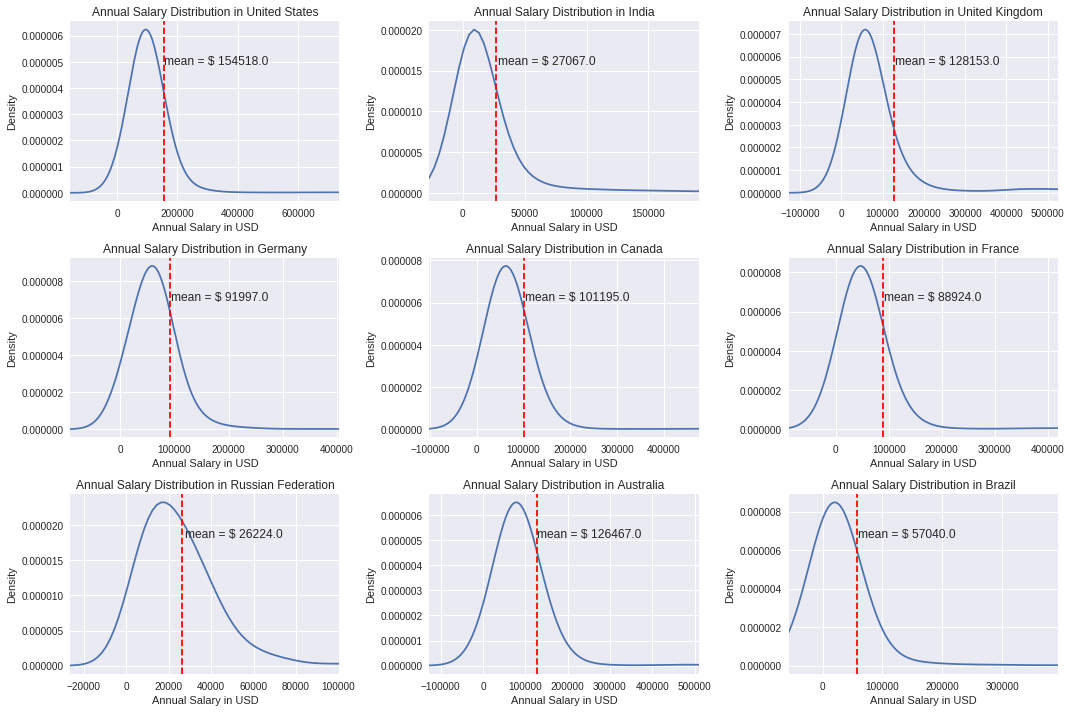

In [306]:
fig = plt.figure(figsize=(15,10))

countries = sal_df['Country'].value_counts().sort_values(ascending=False)[:9].index.tolist()

for i,country in enumerate(countries):
  plt.subplot(3,3,i+1)
  temp = sal_df.loc[sal_df['Country']==country,'ConvertedSalary']

  ax = temp.plot(kind='kde')
  ax.axvline(temp.mean(), linestyle = '--', color = 'red')
  ax.text((temp.mean() + 1400), (float(ax.get_ylim()[1])*0.75), 'mean = $ ' + str(round(temp.mean(),0)), fontsize = 12)
  ax.set_xlabel('Annual Salary in USD')
  ax.set_xlim(-temp.mean(),temp.mean()+2*temp.std())
  ax.set_title('Annual Salary Distribution in {}'.format(country))

plt.tight_layout()
plt.savefig('10.png',bbox_inches = 'tight')
plt.show()

USA has the higest average salary for developers followed by the UK. Inda's mean salary for developers is quite low.

Having moved to Australia recently, it's encouraging to see it's mean pay for developers is relatively high. Just need to break in now!

### Salary By Developer Types

The salary of a developer does not only depend on the country, it also depends on the kind of work they are doing. Here, we will build a function that will give us the annual salary distribution of any kind of developer in any country.

In [307]:
devsal_df = df[['DevType','Country','ConvertedSalary']]
devsal_df.dropna(inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
countries_interested = devsal_df['Country'].value_counts().index.tolist()

devsal_dict = {key: 0 for key in countries_interested}
for dev in devsal_dict.keys():
    devsal_dict[dev] = {key: [] for key in dev_count.index.tolist()}
    
for i, d in enumerate(devsal_df['DevType']):
    all_devs = d.split(';')
    country = devsal_df.iloc[i, 1]
    sal = devsal_df.iloc[i, 2]
    
    for dev in all_devs:
        devsal_dict[country][dev].append(sal)

In [0]:
def dev_country_sal(devsal_dict, dev_type, country, filename):
    '''
    INPUT - devsal_dict - dictionary cointaining salaries for different developers in different countries
            dev_type - string - type of developer
            country - string - name of country
            filename - string - file name of the graph to be saved as
    OUTPUT - 
            desc - string - the description of the column
    '''
    figsize = (15,10)
    df1 = pd.DataFrame({'Annual Salary (US$)':devsal_dict[country][dev_type]})
    ax = df1.plot(kind = 'kde')
    mean = df1['Annual Salary (US$)'].mean()
    ax.axvline(mean, linestyle = '--', color = 'red')
    ax.text((mean + 1400), (float(ax.get_ylim()[1])*0.75), 'mean = $ ' + str(round(mean,0)), fontsize = 12)
    ax.set_xlabel('Annual Salary in USD')
    ax.set_xlim(-mean,mean+2*temp.std())
    ax.set_title('Annual Salary Distribution of {} in {}'.format(dev_type, country), fontsize = 15, y = 1.05)
    plt.savefig(filename,bbox_inches = 'tight')
    plt.show()
    return

Having just moved to Australia to pursue a career in data science, I'm curious to know what's the pay like..

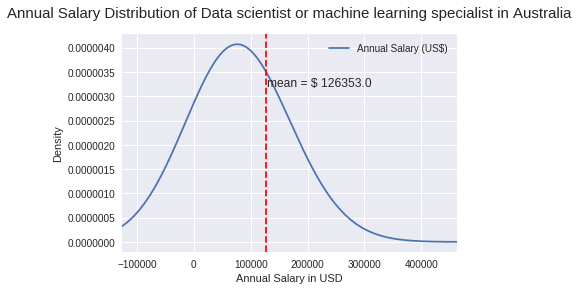

In [310]:
dev_country_sal(devsal_dict, 'Data scientist or machine learning specialist', 'Australia', filename = '11.png')

Looks like the mean salary for data scientists in Australia is around the same as that for developers. Also, most data scientists here seem to have a salary just below the mean.

In [0]:
from google.colab import files
filenames = ['1.png','2.png','3.png','4.png','5.png','6.png','7.png','8.png','9.png','10.png','11.png']
for f in filenames:
    files.download(f) 

## If I start learning how to code today, will I make it?


I totally understand the all the doubts that can run through your mind when you consider switching careers, especially if you don't have any coding experience or formal education in the field and a lot of the times these things can decide if you can break into the field and thrive in it. 

So, in this section, we will build a simple model that will predict if you will 'make it' as a developer.

To do this, we'll first define what 'making it' means. 'Making it' has no solid definition and varies from person to person. For the purpose of this model, we will define it as getting an annual salary that is over the worldwide median for developers.

In [312]:
sal_df = df[['Age', 'Country', 'FormalEducation', 'UndergradMajor', 'DevType', 'YearsCoding', 'ConvertedSalary']]

for col in sal_df.columns.tolist():
    col_description(col, schema)

Age : What is your age? If you prefer not to answer, you may leave this question blank.

Country : In which country do you currently reside?

FormalEducation : Which of the following best describes the highest level of formal education that you’ve completed?

UndergradMajor : You previously indicated that you went to a college or university. Which of the following best describes your main field of study (aka 'major')

DevType : Which of the following describe you? Please select all that apply.

YearsCoding : Including any education, for how many years have you been coding?

ConvertedSalary : Salary converted to annual USD salaries using the exchange rate on 2018-01-18, assuming 12 working months and 50 working weeks.



In [313]:
sal_df.dropna(how = 'any', subset = ['ConvertedSalary'], axis = 0, inplace = True)
sal_df['ConvertedSalary'].isnull().sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0

In [314]:
sal_df.shape

(47702, 7)

In [315]:
sal_df.dtypes

Age                 object
Country             object
FormalEducation     object
UndergradMajor      object
DevType             object
YearsCoding         object
ConvertedSalary    float64
dtype: object

In [316]:
sal_df['greater than median'] = sal_df['ConvertedSalary'] > sal_df['ConvertedSalary'].median()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [317]:
sal_df.shape

(47702, 8)

In [318]:
sal_df.dtypes

Age                     object
Country                 object
FormalEducation         object
UndergradMajor          object
DevType                 object
YearsCoding             object
ConvertedSalary        float64
greater than median       bool
dtype: object

In [0]:
cats_lst = sal_df.select_dtypes(include = ['object']).columns.tolist()
for col in cats_lst:
    sal_df = pd.concat([sal_df.drop(col, axis=1), pd.get_dummies(sal_df[col], prefix=col, prefix_sep='_', drop_first=True)], axis=1)


In [0]:
x = sal_df.drop(['ConvertedSalary', 'greater than median'], axis = 1)
y = sal_df['greater than median']

In [321]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.20)
model1 = DecisionTreeClassifier(max_depth = 12, min_samples_leaf = 10)
model1.fit(xtrain, ytrain)
ypreds = model1.predict(xtest)
acc_score = accuracy_score(ytest, ypreds)

print('Accuracy of the model is: {}'.format(acc_score))

Accuracy of the model is: 0.8150089089194005


This model is not acceptable in any way, as it has an accuracy of just over 81%. This model can definitely be made better by tuning some of the hyperparameters of the model using gridsearch. However, due to restricted computational power, I will not be doing that as a part of this project. So, we will use this model for the remainder of this project.

Now, that we have built a model, let's use it to see if I can 'make it' in Australia as a data scientiest with whatever qualification and experience I have. Fingers crossed!


In [322]:
pred_this = pd.DataFrame(data = None, columns = x.columns.tolist())
for col in pred_this.columns.tolist():
    pred_this.loc[0,col] = 0

pred_this.loc[0,'Age_25 - 34 years old'] = 1
pred_this.loc[0,'Country_Australia'] = 1
pred_this.loc[0,'FormalEducation_Bachelor’s degree (BA, BS, B.Eng., etc.)'] = 1
pred_this.loc[0,'UndergradMajor_Another engineering discipline (ex. civil, electrical, mechanical)'] = 1
pred_this.loc[0,'DevType_Data or business analyst;Data scientist or machine learning specialist'] = 1
pred_this.loc[0,'YearsCoding_3-5 years'] = 1

model.predict(pred_this)

array([ True])

Woohoo! Looks like as it is, I can make it! However, the model is only 82% accurate and my case just could be a false positive. So I'll keep my fingers crossed and keep working hard!

Feel free to use this model if you are considering starting a new career as a developer and fretting over the same things as me when I started.

If you do use this model and get a negative result, here are a few things to keep in mind:
*   This is a very simple model with an accuracy of just 81%.
*   You could be a false negative.
* The defination of 'making it' used here is not perfect.
*   **If you love what you do and work hard, you *will* make it.**



That's it for this project. Thank you for following along my work. If you are looking to start off this journey, I only wish you the best.




